# Tannhäuser grey-scale


Black and White image compression with SVD 
* Decompose Matrix X as U*Σ*VT 
* Might approximate this by some low rank product X = UrΣrVTr (this is a rank R 
approximation of X) 
* this approximation is the product of a few r columns and r rows of the original m by m rows and columns of X 

## Initialization 

In [1]:
import os
import numpy as np # for representing matrices as numpy arrays 
from PIL import Image # for image opening / show operations (image.open(), Image.show() etc...)
# numpy.linalg.svd is the numpy function that performs SVD 
import matplotlib.pyplot as plt
import matplotlib.image
import requests  # Added requests import
from io import BytesIO  # Added BytesIO import

In [2]:
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if there's an error
    return Image.open(BytesIO(response.content))

url = 'https://static.wikia.nocookie.net/supermarioglitchy4/images/f/f3/Big_chungus.png/revision/latest?cb=20200511041102'
img = download_image(url)

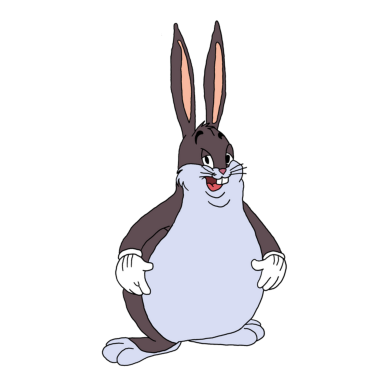

In [4]:
plt.axis('off')
plt.imshow(img)
plt.show()  # Added plt.show() to display the image

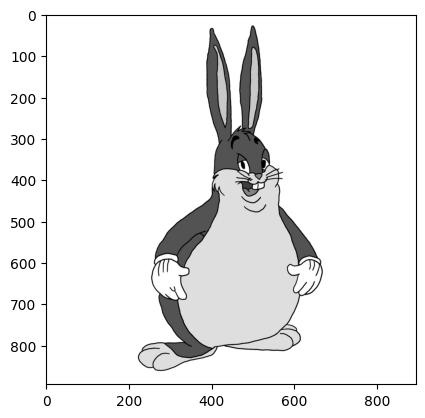

In [5]:
# RBG Matrix to greyscale conversion 
img_hold = img.convert('LA')
img_show = plt.imshow(img_hold) #assigning it a variable removes the line of text infront of the image produced 

### Numpy Conversion 

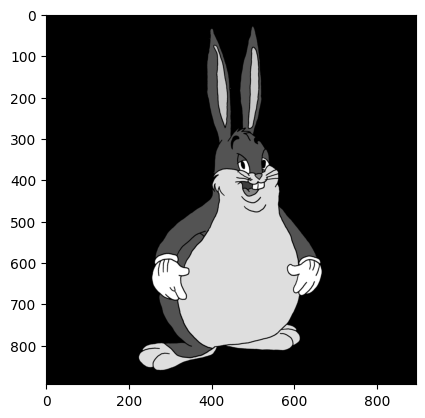

In [6]:
# Converting it to original matrix X 
img2Dmat = np.array(list(img_hold.getdata(band=0)), float)
img2Dmat.shape = (img_hold.size[1], img_hold.size[0])
img2Dmat_1 = np.matrix(img2Dmat)
plt.imshow(img2Dmat_1, cmap='gray')

## SVD Calculation 

In [7]:
U, Σ, VT = np.linalg.svd(img2Dmat)

In [ ]:
## Image Reconstruction

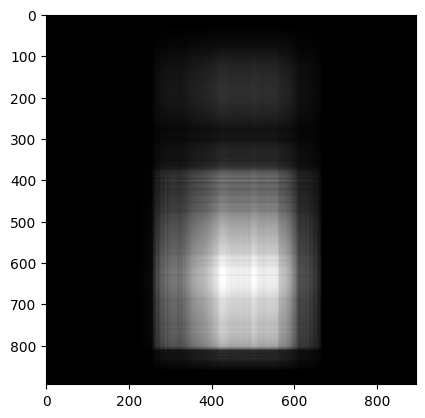

In [8]:
reconstimg = np.matrix(U[:, :1]) * np.diag(Σ[:1]) * np.matrix(VT[:1, :])
plt.imshow(reconstimg, cmap='gray')

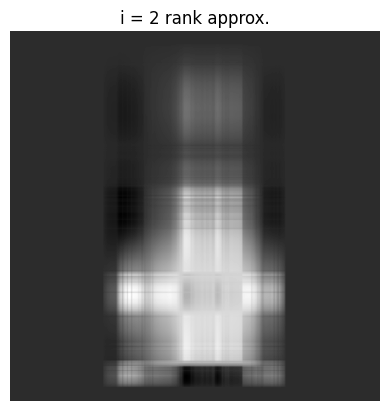

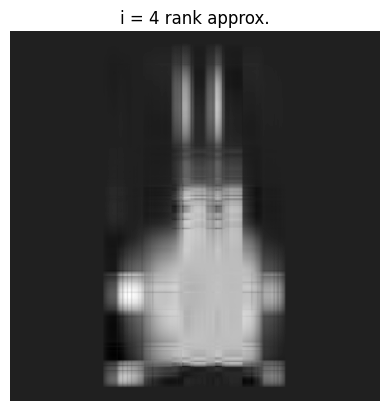

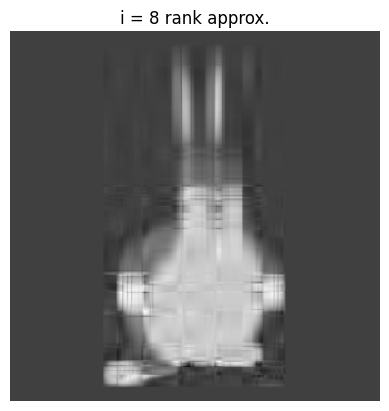

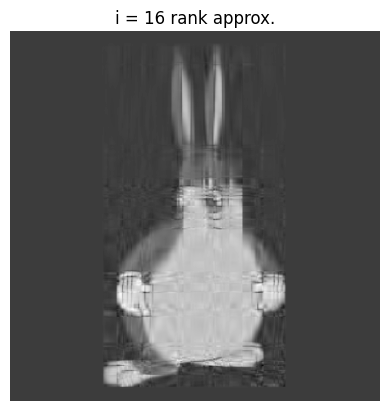

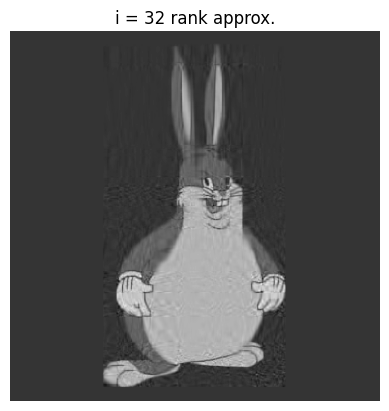

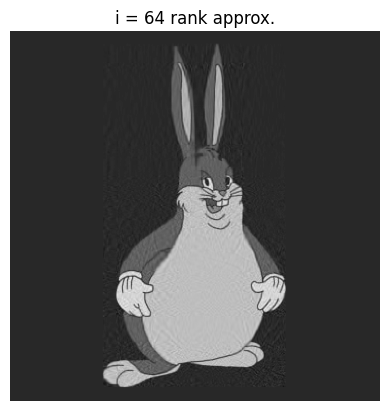

In [10]:
# Approximation of matrix at different ranks 
U, Σ, VT = np.linalg.svd(img2Dmat_1,full_matrices=False) 

#full_matrices=false means returning the more computationally efficient matrix 
# () rather than the huge and inefficient m by m 
i =0 
for i in [2, 4, 8, 16, 32, 64]: 
    imgApprox = np.matrix(U[:, :i]) * np.diag(Σ[:i]) * np.matrix(VT[:i, :]) 
    # take the frist i columns of times the first 
    plt.figure(i+1)
    plt.imshow(imgApprox, cmap='gray') 
    # equivalent to Brunton's img = plt.imshow(Xapprox)
    plt.title("i = %s rank approx." % i)
    plt.axis('off') # turn off axis 
    plt.show()
    # Essentially, this only stores the first 2,4,8... columns of U and V 
    # in the first 100 diagonal elements of Σ, which will be sth like an 
    # 8 times comopression of original matrix X

### Size recalculation and comparison 

In [11]:
img2Dmat.shape

(894, 894)

In [12]:
original_size = 894*894
original_size

799236

In [14]:
revised_size = 64*894 + 64 + 64*894
revised_size

114496

In [15]:
revised_size/original_size

0.14325681025379236

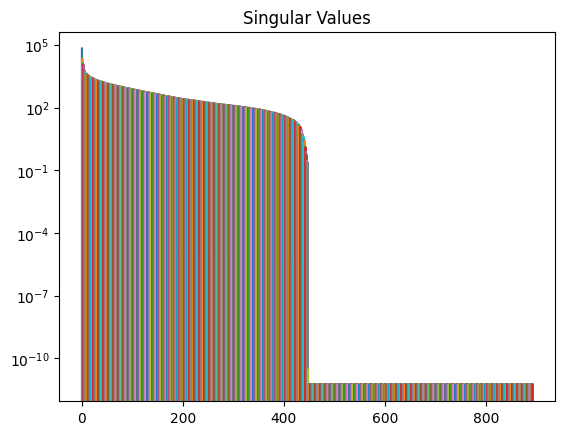

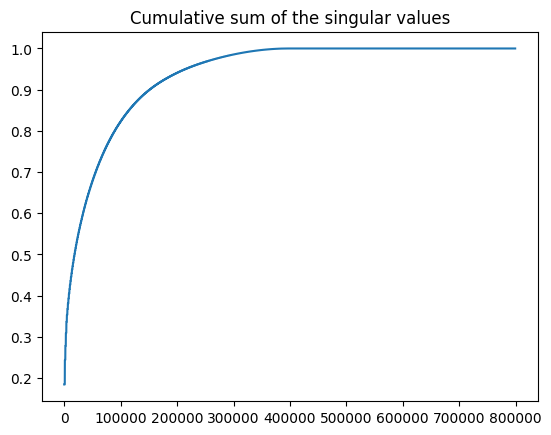

In [16]:
# diagnoal elements of Σ, usually in a logj vs j graph 
plt.figure(1)
plt.semilogy(np.diag(Σ))
plt.title('Singular Values')
plt.show()
# note that the first few modes are capturing mot of the energy, i.e. the singular values between 1-200 is much much greater than the singular values from 600 to 800
# this means we can get away from throwing away only the first, say 200 and the remaining a sort of irrelevant 

# the cumulative sum of all Σj from j=1:i divided by sum of Σj from j=1:m 
# tells you how much of the matrix is captured by  
plt.figure(2)
plt.plot(np.cumsum(np.diag(Σ))/np.sum(np.diag(Σ)))
plt.title('Cumulative sum of the singular values')
plt.show()
# this graph shows that by keeping just the first vector would capture around 30% of the entire energy 
# dont need to keep all the vectors in a high res image, thus we can compress it using the SVD algorithm